In [1]:
import pyodbc
import pandas as pd
import dask.dataframe as dd
import math
import numpy as np
import datetime
import pandas.io.sql as sql
import datetime as d
import matplotlib.pyplot as plt
#from pandas.tools.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt


C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
cnxn= pyodbc.connect("Driver={SQL Server};"
                    "Server=XXXXXXXXXX;"
                    "Database=ZZZZZZZZ;"
                    "Trusted_Connection=yes;"
                    'uid=AAAAAAAn;pwd=AAAAAA')

data = pd.read_sql('SELECT * FROM INFORMATION_SCHEMA.TABLES', cnxn)



In [3]:
tiba_monthly= pd.read_sql('SELECT * FROM sssssssss', cnxn)

In [4]:
tiba_monthly['Date'] = [d.date() for d in tiba_monthly['TransactionDateTime']]
tiba_monthly['Times'] = [d.time() for d in tiba_monthly['TransactionDateTime']]

In [5]:
tiba_monthly['Date']= pd.to_datetime(tiba_monthly['Date'])

In [6]:
Entry_Exit= []
for i in range(0, len(tiba_monthly['DeviceName'])):
    if 'Entr' in tiba_monthly['DeviceName'][i] and (tiba_monthly['TransactionType'][i]== '1' or tiba_monthly['TransactionType'][i]=='3') and (tiba_monthly['RecType'][i]==51 or tiba_monthly['RecType'][i]==53):
        Entry_Exit.append('Entry')
    else:
        Entry_Exit.append('Exit')

In [7]:
tiba_monthly['Entry_Exit']= Entry_Exit

In [8]:
tiba_monthly['Entry_Exit'].value_counts()

Exit     1492614
Entry     991571
Name: Entry_Exit, dtype: int64

In [9]:
MUID=[]
for i in tiba_monthly['MonthlyID']:
    muid= (i[1:5]+i[-4:])
    MUID.append((muid))

In [10]:
# Muid_int = []
# for x in tiba_monthly['MonthlyID']:
#     try:
#         value = np.int(x)
#     except ValueError:
#         value = x
#     Muid_int.append(value)

In [11]:
tiba_monthly['MUID']= MUID

In [12]:
tiba_monthly = tiba_monthly[tiba_monthly['RecType'] != 0] 

In [13]:
tiba_monthly['MonthlyID'] = tiba_monthly['MonthlyID'].replace(r'^\s*$', np.nan, regex=True)

In [14]:
tiba_monthly= tiba_monthly.dropna()

In [15]:
tiba_monthly.reset_index(drop=True)

,MonthlyDBID,MonthlyID,Badge,ParkDBID,CompanyDBID,CompanyID,SubCompanyDBID,SubCompanyID,TransactionDateTimeInt,DeviceID,...,ErrorTypeDescription,RecType,TransactionType,TransactionDateTime,RecordIndex,LAZLocationId,Date,Times,Entry_Exit,MUID
0,26832,019180000001351,9204,1,52,2005445593,0,,504950573,81,...,,51,1,2016-01-01 08:02:53,59,690501,2016-01-01,08:02:53,Entry,19181351
1,4396,019180000000696,1481,1,59,2005445922,0,,504950231,82,...,,51,1,2016-01-01 07:57:11,60,690501,2016-01-01,07:57:11,Entry,19180696
2,27071,019180000001502,9115,1,52,2005445593,0,,504949075,88,...,,52,2,2016-01-01 07:37:55,61,690501,2016-01-01,07:37:55,Exit,19181502
3,4387,019180000000821,1472,1,65,2005446333,0,,504948509,81,...,,51,1,2016-01-01 07:28:29,62,690501,2016-01-01,07:28:29,Entry,19180821
4,26769,019180000001288,8134,1,52,2005445593,0,,504948369,88,...,,52,2,2016-01-01 07:26:09,63,690501,2016-01-01,07:26:09,Exit,19181288
5,5805,019180000000436,2890,1,52,2005445593,0,,504948244,82,...,,51,1,2016-01-01 07:24:04,64,690501,2016-01-01,07:24:04,Entry,19180436
6,26826,019180000001345,6144,1,52,2005445593,0,,504948052,81,...,,51,1,2016-01-01 07:20:52,65,690501,2016-01-01,07:20:52,Entry,19181345
7,3172,019180000000469,257,1,52,2005445593,0,,504947733,82,...,,51,1,2016-01-01 07:15:33,66,690501,2016-01-01,07:15:33,Entry,19180469
8,4719,019180000000515,1804,1,52,2005445593,0,,504947584,82,...,,51,1,2016-01-01 07:13:04,67,690501,2016-01-01,07:13:04,Entry,19180515
9,27065,019180000001496,9154,1,131,2005499238,0,,504947196,86,...,,52,2,2016-01-01 07:06:36,68,690501,2016-01-01,07:06:36,Exit,19181496


In [16]:
tiba_monthly = tiba_monthly[tiba_monthly['Date'].dt.year != 2016]

In [17]:
tiba_monthly.reset_index(drop=True)

,MonthlyDBID,MonthlyID,Badge,ParkDBID,CompanyDBID,CompanyID,SubCompanyDBID,SubCompanyID,TransactionDateTimeInt,DeviceID,...,ErrorTypeDescription,RecType,TransactionType,TransactionDateTime,RecordIndex,LAZLocationId,Date,Times,Entry_Exit,MUID
0,27119,019200000000440,8107,2,35,999999999,0,,577475896,86,...,,52,2,2018-04-19 17:58:16,69,690502,2018-04-19,17:58:16,Exit,19200440
1,27930,019200000000577,6233,2,35,999999999,0,,577475889,86,...,,52,2,2018-04-19 17:58:09,70,690502,2018-04-19,17:58:09,Exit,19200577
2,26636,019200000000191,5330,2,45,2005446431,0,,577475861,87,...,,52,2,2018-04-19 17:57:41,71,690502,2018-04-19,17:57:41,Exit,19200191
3,15134,019200000000196,5119,2,45,2005446431,0,,577475785,86,...,,52,2,2018-04-19 17:56:25,72,690502,2018-04-19,17:56:25,Exit,19200196
4,27574,019200000000521,8170,2,35,999999999,0,,577475704,86,...,,52,2,2018-04-19 17:55:04,73,690502,2018-04-19,17:55:04,Exit,19200521
5,29958,019200000000899,6426,2,48,2005457279,0,,577475697,87,...,,52,2,2018-04-19 17:54:57,74,690502,2018-04-19,17:54:57,Exit,19200899
6,10750,019200000000231,735,2,35,999999999,0,,577475607,86,...,,52,2,2018-04-19 17:53:27,75,690502,2018-04-19,17:53:27,Exit,19200231
7,26517,019200000000367,6091,2,35,999999999,0,,577475571,86,...,,52,2,2018-04-19 17:52:51,76,690502,2018-04-19,17:52:51,Exit,19200367
8,11012,019200000000264,997,2,35,999999999,0,,577475417,86,...,,52,2,2018-04-19 17:50:17,77,690502,2018-04-19,17:50:17,Exit,19200264
9,15370,019200000000310,5355,2,45,2005446431,0,,577475377,86,...,,52,2,2018-04-19 17:49:37,78,690502,2018-04-19,17:49:37,Exit,19200310


In [18]:
tiba_monthly= tiba_monthly[['MonthlyDBID', 'LAZLocationId', 'Date', 'Times','Entry_Exit', 'MUID' ]]

In [19]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [20]:
tiba_monthly['Entry_Exit']= tiba_monthly['Entry_Exit'].astype('category')
tiba_monthly['Entry_Exit']= tiba_monthly['Entry_Exit'].cat.codes
tiba_monthly['Entry_Exit']= tiba_monthly['Entry_Exit'].astype(np.uint8)

In [21]:
tiba_monthly['LAZLocationId']= tiba_monthly['LAZLocationId'].astype(int)

In [22]:
Entry_data= tiba_monthly[tiba_monthly['Entry_Exit']== 0]

In [23]:
Exit_data= tiba_monthly[tiba_monthly['Entry_Exit']== 1] 

In [24]:
df_merge = pd.merge(Exit_data, Entry_data, how='left', on=['MUID', 'Date'])

In [25]:
df_merge=df_merge.dropna()

In [26]:
df_merge= df_merge.drop_duplicates(keep='first')

In [27]:
df_merge= df_merge[['MUID', 'Times_x','Times_y', 'LAZLocationId_x', 'Date']]

In [28]:
df_merge['Entry']= df_merge['Times_y']

In [29]:
df_merge['Exit']= df_merge['Times_x']

In [30]:
df_merge= df_merge.drop(['Times_x', 'Times_y'], axis=1)

In [31]:
df_merge['Date']= pd.to_datetime(df_merge['Date'])

In [32]:
df_merge.reset_index(drop=True, inplace=True)

In [33]:
def diff_times(t1, t2):
    # caveat emptor - assumes t1 & t2 are python times, on the same day and t2 is after t1
    h1, m1, s1 = t1.hour, t1.minute, t1.second
    h2, m2, s2 = t2.hour, t2.minute, t2.second
    t1_secs = s1 + 60 * (m1 + 60*h1)
    t2_secs = s2 + 60 * (m2 + 60*h2)
    return( t2_secs - t1_secs)

In [34]:
Duration=[]
for i in range(0, len(df_merge)):
    Duration.append((diff_times(df_merge['Entry'][i], df_merge['Exit'][i]))/60)

In [35]:
df_merge['Duration']= Duration

In [36]:
df_merge= df_merge[df_merge['Duration'] > 0]

In [37]:
df_merge.reset_index(drop=True).head()

,MUID,LAZLocationId_x,Date,Entry,Exit,Duration
0,19200440,690502,2018-04-19,08:35:21,17:58:16,562.916667
1,19200577,690502,2018-04-19,08:30:50,17:58:09,567.316667
2,19200191,690502,2018-04-19,09:21:12,17:57:41,516.483333
3,19200196,690502,2018-04-19,09:35:44,17:56:25,500.683333
4,19200521,690502,2018-04-19,08:48:40,17:55:04,546.400000


In [38]:
df_merge= df_merge.set_index('Date')

In [39]:
df_merge= df_merge.sort_index()

In [40]:
pd.set_option('display.max_rows', 1500)

In [41]:
df_merge_group= df_merge.groupby(df_merge.index)['LAZLocationId_x'].count()

In [42]:
df_merge_group.columns = ['Count']

In [73]:
df_merge_group

Date
2017-01-17     293
2017-01-18    1875
2017-01-19    1849
2017-01-20    2033
2017-01-21     718
2017-01-22     179
2017-01-23    1822
2017-01-24    1807
2017-01-25    1888
2017-01-26    2472
2017-01-27    2332
2017-01-28     726
2017-01-29     264
2017-01-30    1851
2017-01-31    2123
2017-02-01    1935
2017-02-02    2073
2017-02-03    1981
2017-02-04     602
2017-02-05     122
2017-02-06    1685
2017-02-07    1903
2017-02-08    1785
2017-02-09    1807
2017-02-10    1985
2017-02-11     697
2017-02-12     469
2017-02-13    2010
2017-02-14    2150
2017-02-15    1862
2017-02-16    2006
2017-02-17    1906
2017-02-18     614
2017-02-19     362
2017-02-20    1061
2017-02-21    2034
2017-02-22    1985
2017-02-23    1951
2017-02-24    1964
2017-02-25     684
2017-02-26     214
2017-02-27    1734
2017-02-28    1866
2017-03-01    1819
2017-03-02    1990
2017-03-03    1905
2017-03-04    1352
2017-03-05     429
2017-03-06    1783
2017-03-07    1845
2017-03-08    1839
2017-03-09    1755
2017-03

In [43]:
df_merge_group.index = pd.to_datetime(df_merge_group.index)

In [44]:
df_merge_group= pd.Series(df_merge_group)

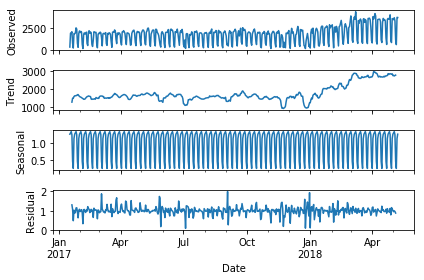

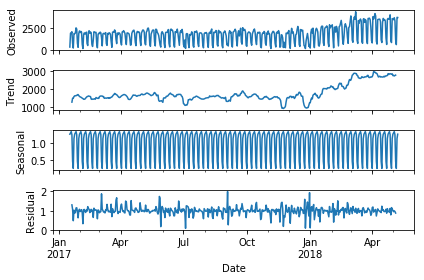

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_merge_group, model='multiplicative')
result.plot()


In [46]:
train_size = int(len(df_merge_group) * 0.50)
train, test = df_merge_group[0:train_size], df_merge_group[train_size:]

In [47]:
import math
from math import sqrt
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=1989.000, Expected=2046
>Predicted=2046.000, Expected=2151
>Predicted=2151.000, Expected=2319
>Predicted=2319.000, Expected=2107
>Predicted=2107.000, Expected=1023
>Predicted=1023.000, Expected=415
>Predicted=415.000, Expected=1805
>Predicted=1805.000, Expected=2137
>Predicted=2137.000, Expected=1550
>Predicted=1550.000, Expected=2070
>Predicted=2070.000, Expected=2430
>Predicted=2430.000, Expected=860
>Predicted=860.000, Expected=622
>Predicted=622.000, Expected=2490
>Predicted=2490.000, Expected=2180
>Predicted=2180.000, Expected=2257
>Predicted=2257.000, Expected=2300
>Predicted=2300.000, Expected=2015
>Predicted=2015.000, Expected=475
>Predicted=475.000, Expected=384
>Predicted=384.000, Expected=1810
>Predicted=1810.000, Expected=1946
>Predicted=1946.000, Expected=2020
>Predicted=2020.000, Expected=1934
>Predicted=1934.000, Expected=1882
>Predicted=1882.000, Expected=795
>Predicted=795.000, Expected=504
>Predicted=504.000, Expected=1781
>Predicted=1781.000, Expected=2026

In [48]:
df_merge_group.describe()

count     477.000000
mean     1742.184486
std       921.761827
min       122.000000
25%       861.000000
50%      1888.000000
75%      2180.000000
max      4300.000000
Name: LAZLocationId_x, dtype: float64

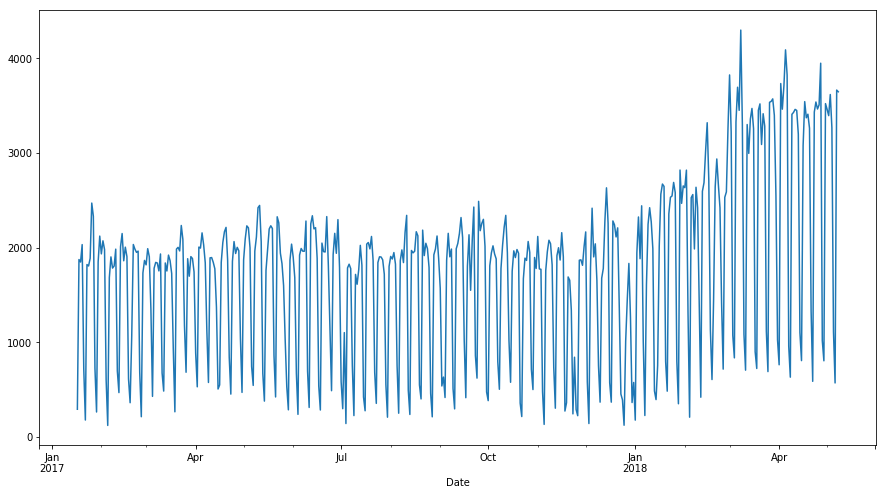

In [49]:
plt.figure(figsize=(15,8))
df_merge_group.plot()

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """


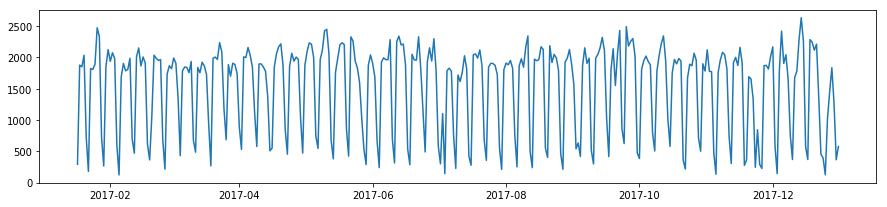

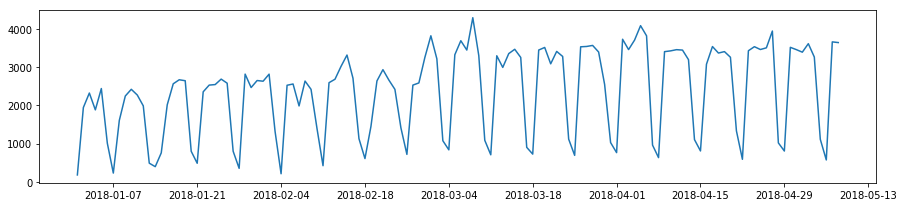

In [50]:
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
#series = Series.from_csv('dataset.csv')
groups = df_merge_group['2017':'2018'].groupby(TimeGrouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
    plt.figure(figsize=(15,7))
    plt.subplot((n_groups*100) + 10 + i)
    i += 1
    plt.plot(group)
pyplot.show()

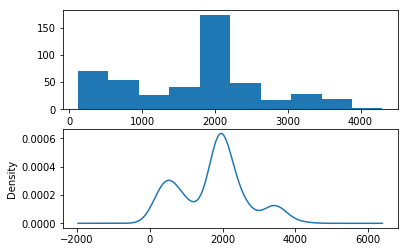

In [51]:
plt.figure(1)
plt.subplot(211)
plt.hist(df_merge_group)
plt.subplot(212)
df_merge_group.plot(kind='kde')

In [52]:
def adf(ts):
    rolmean= pd.rolling_mean(ts, window=12)
    rolstd= pd.rolling_std(ts, window= 12)
    plt.figure(figsize=(10,7))
    orig= plt.plot(ts, color= 'red', label= 'Original')
    mean= plt.plot(rolmean, color= 'blue', label= 'Rolmean')
    std= plt.plot(rolstd, color= 'black', label= 'Rolstd')
    plt.show()
    
    adftest= adfuller(ts, autolag= 'AIC')
    adfoutput= pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used','Number of Observations Used'])
    for key, value in adftest[4].items():
        adfoutput['Critical Value (%s)' %key] = value
    return adfoutput

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


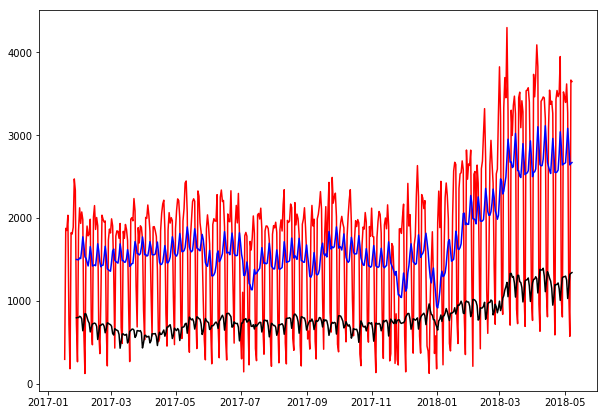

Test Statistic                  -0.419787
p-value                          0.906742
# of Lags Used                  17.000000
Number of Observations Used    459.000000
Critical Value (1%)             -3.444677
Critical Value (5%)             -2.867857
Critical Value (10%)            -2.570135
dtype: float64

In [53]:
adf(df_merge_group)

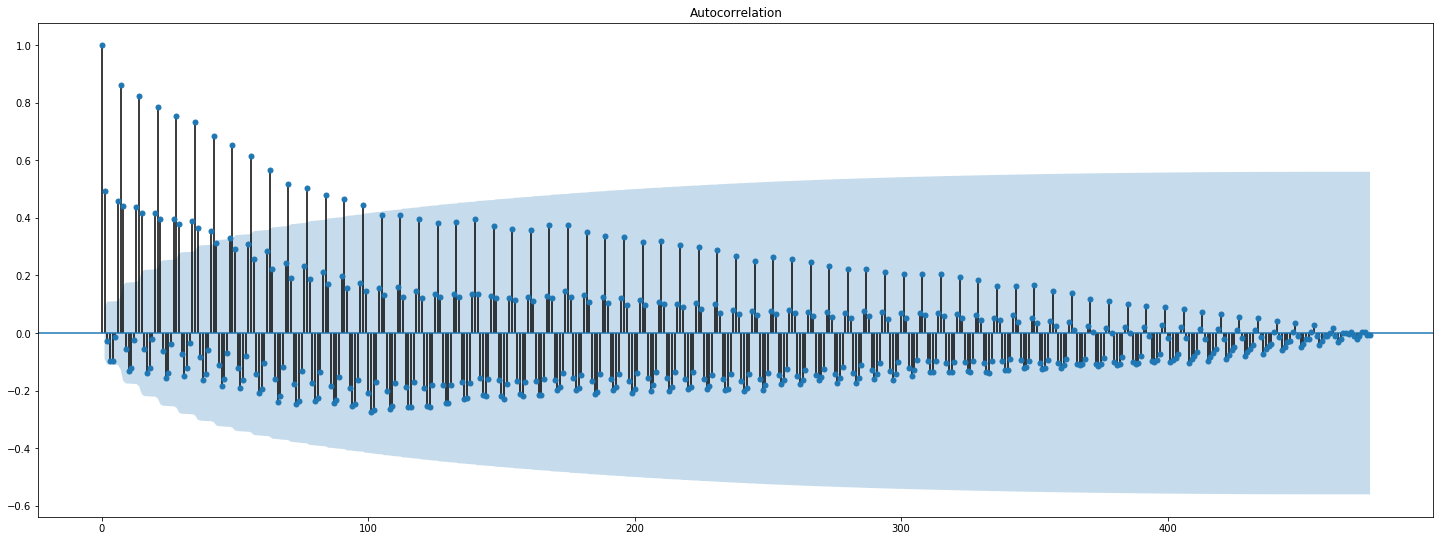

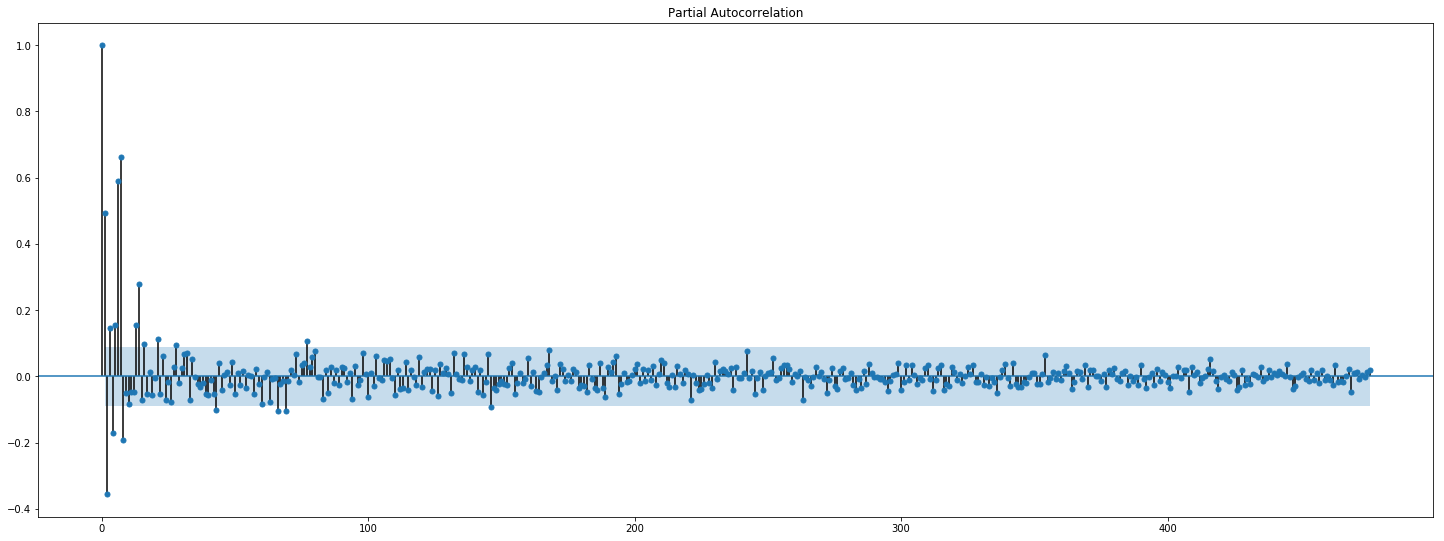

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(25, 20))
plt.subplot(211)
plot_acf(df_merge_group, ax=pyplot.gca())
plt.figure(figsize=(25, 20))
plt.subplot(212)
plot_pacf(df_merge_group, ax=pyplot.gca())
plt.show()

In [55]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

In [56]:
diff_df_merge= difference(df_merge_group, 12)

In [57]:
type(diff_df_merge)

list

In [58]:
#diff_df_merge= diff_df_merge.astype('float32')

In [59]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [60]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
    # difference data
        months_in_year = 12
        diff = difference(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0, method='css')
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse

In [61]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 

In [62]:
p_values= range(0, 9)
d_values= range(0, 1)
q_values= range(0, 9)

In [63]:
#evaluate_models(df_merge_group, p_values,d_values, q_values)

In [64]:
# prepare training dataset
X=df_merge_group
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
    # make predictions
predictions = list()
for t in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    model = ARIMA(diff, order=(4,0,9))
    model_fit = model.fit(trend='nc', disp=0, method='css')
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    history.append(test[t])
    # calculate out of sample error
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print(rmse)

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

496.143532061596


C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 0
count   239.000000
mean     38.161847
std     495.711850
min   -2251.678021
25%    -217.616464
50%      59.962490
75%     299.177896
max    1621.144429


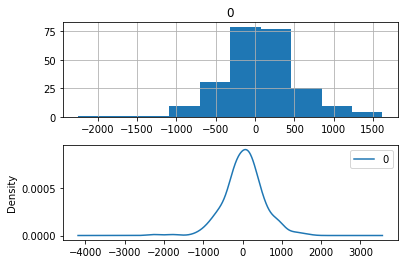

In [65]:
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
plt.figure()
plt.subplot(211)
residuals.hist(ax=pyplot.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
plt.show()

# BIAS CORRELATION

In [66]:
res=residuals.describe()[0]
bias= res[1]

In [67]:
print(bias)

In [74]:
X=df_merge_group
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
    # make predictions
predictions = list()
for t in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    model = ARIMA(diff, order=(4,0,9))
    model_fit = model.fit(trend='nc', disp=0, method='css')
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    history.append(test[t])
    # calculate out of sample error
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print(rmse)

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VSinghChauhan\AppData\Local\Continu

496.143532061596


C:\Users\VSinghChauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [69]:
df = pd.DataFrame({'Predictions':predictions, 'Expected': test})

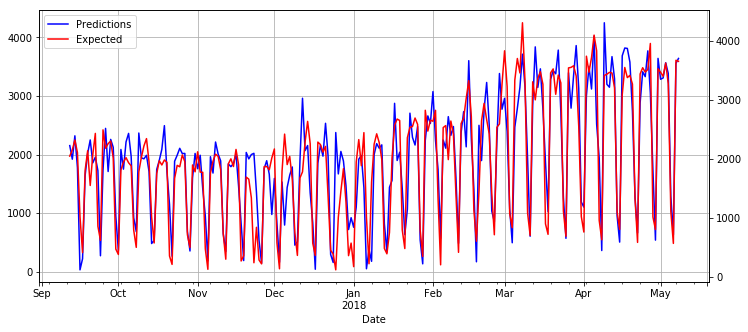

In [70]:
plt.figure(figsize=(12,5))
plt.xlabel('Count of Occupancy')

ax1 = df['Predictions'].plot(color='blue', grid=True, label='Predictions')
ax2 = df['Expected'].plot(color='red', grid=True, secondary_y=True, label='Expected')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [71]:
forecast_21= abs(model_fit.forecast(21)[0])

In [72]:
forecast_21

array([ 129.96853912,  354.31999854, 2586.79778124, 2464.54142688,
       2130.86954999, 2916.16313235,  132.79631248,  107.04052697,
        239.95841897, 2628.69254771, 2389.65047128, 2148.88020483,
       2830.68141314,  105.95585148,   95.92461619,  180.62894185,
       2586.69580777, 2289.06953155, 2111.47712394, 2748.38311501,
         80.46616598])